In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_all_no_noise.csv")
data.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data=data[data.pxt<=0.06]
data=data.drop_duplicates()
data=data.reset_index(drop=True)
print(data.shape)

(169271, 28)


In [3]:
# def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
#     return 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x/i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))

# all_res=[]
# temp_res=[]
# temp_pxt=[]
# temp_apxt=[]
# temp_neh=[]
# temp_pep=[]
# temp_merged_all=data.merge(data,on=['pep','pxt','neh'])
# print(temp_merged_all.shape)
# for k in range(59*1):#(temp_merged_all.shape[0]):
#     temp_merged=temp_merged_all.loc[k:k,:]
#     temp_merged=temp_merged.reset_index(drop=True)
    
    
#     index=0
#     pxt        =temp_merged.pxt[index]
#     delta2_x   =temp_merged.delta2_x[index]
#     delta1_x   =temp_merged.delta1_x[index]
#     i1_x       =temp_merged.i1_x    [index]
#     i0_x       =temp_merged.i0_x    [index]
#     i2_x       =temp_merged.i2_x    [index]
#     neh        =temp_merged.neh     [index]
#     pep        =temp_merged.pep     [index]

#     i1_0_i0_0=(i1_x/i0_x) - delta1_x   
#     x=i1_x

#     res=[]
#     xs=[]
#     ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x)  

#     for i in range(0,51):  

#         xs.append(x+i*x/1000)   
#         temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
#         temp_res.append( (x - (x+i*x/1000))/x)
#         temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
#         temp_apxt.append(ccpxt)
#         temp_neh.append(neh)        
#         temp_pep.append(pep)

#         xs.append(x-i*x/1000)
#         temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
#         temp_res.append( (x - (x -i*x/1000))/x)
#         temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
#         temp_apxt.append(ccpxt)
#         temp_neh.append(neh)      
#         temp_pep.append(pep)
    

# df=pd.DataFrame() 
# df["I1_err"]=[round(x,4) for x in temp_res]
# df["pxt_err"]=temp_pxt
# df["pxt"]=[round(x,3) for x in temp_apxt]
# df["neh"]=temp_neh
# df["pep"]=temp_pep
# print(df.shape)


# plot_data=df.query('abs(I1_err) in [0,0.01,0.03,0.05] and pxt in [0.001,0.005,0.01,0.020,0.030,0.040,0.050]').drop_duplicates()
# plot_data.I1_err=abs(plot_data.I1_err)
# plot_data.pxt_err=abs(plot_data.pxt_err)
# plot_data=plot_data[['I1_err','pxt_err','pxt']].groupby(by=["pxt","I1_err"]).agg({'pxt_err':['mean','std']}).reset_index()
# plot_data.columns=['pxt','I1_err','avg','sd']
# plt.figure(figsize=(9,6))
# I1_errs=[0,0.01,0.03,0.05]
# for i in range(len(delta_2_errs)) :
#     I1_err=I1_errs[i]
#     y=[]
#     x=[]
#     er=[]
#     for pxt in [0.005,0.01,0.020,0.030,0.040,0.050]:
#         temp=plot_data[(plot_data.pxt==pxt) &(plot_data.I1_err==I1_err)].reset_index(drop=True)        
#         y.append(float(temp.avg))
#         x.append(pxt + i*5E-4)
#         er.append(float(temp.sd))   
                
#     plt.errorbar(x, y, er, linestyle='None', marker='o',label=f"Relative Error = {100*delta_2_err}%")
    
# plt.legend()

In [4]:
def new_pxt(delta2_x,delta1_x,i1_x_i0_x):
    return 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x_i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))

all_res=[]
temp_res=[]
temp_pxt=[]
temp_apxt=[]
temp_neh=[]
temp_pep=[]
temp_merged_all=data.merge(data,on=['pep','pxt','neh'])
print(temp_merged_all.shape)
for k in range(59*200):#(temp_merged_all.shape[0]):
    temp_merged=temp_merged_all.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
    
    
    index=0
    pxt        =temp_merged.pxt[index]
    delta2_x   =temp_merged.delta2_x[index]
    delta1_x   =temp_merged.delta1_x[index]
    i1_x       =temp_merged.i1_x    [index]
    i0_x       =temp_merged.i0_x    [index]
    i2_x       =temp_merged.i2_x    [index]
    neh        =temp_merged.neh     [index]
    pep        =temp_merged.pep     [index]

    i1_0_i0_0=(i1_x/i0_x) - delta1_x   
    x=delta1_x

    res=[]
    xs=[]
    ccpxt=new_pxt(delta2_x,delta1_x,i1_x/i0_x)  

    for i in range(0,51):  

        xs.append(x+i*x/1000)   
        temp_i1_x= xs[-1] + i1_0_i0_0  
        
        temp_res.append( (x - (x+i*x/1000))/x)        
        temp_pxt.append( (new_pxt(delta2_x,xs[-1],temp_i1_x) -ccpxt)/ccpxt)
        temp_apxt.append(ccpxt)
        temp_neh.append(neh)        
        temp_pep.append(pep)
        
        
        xs.append(x-i*x/1000)   
        temp_i1_x= xs[-1] + i1_0_i0_0         
        temp_res.append( (x - (x+i*x/1000))/x) 
        
        temp_pxt.append( (new_pxt(delta2_x,xs[-1],temp_i1_x) -ccpxt)/ccpxt)
        temp_apxt.append(ccpxt)
        temp_neh.append(neh)        
        temp_pep.append(pep)
        
    
df=pd.DataFrame() 
df["delta_1_err"]=[round(x,4) for x in temp_res]
df["pxt_err"]=temp_pxt
df["pxt"]=[round(x,3) for x in temp_apxt]
df["neh"]=temp_neh
df["pep"]=temp_pep
print(df.shape)


(169271, 53)
(1203600, 5)


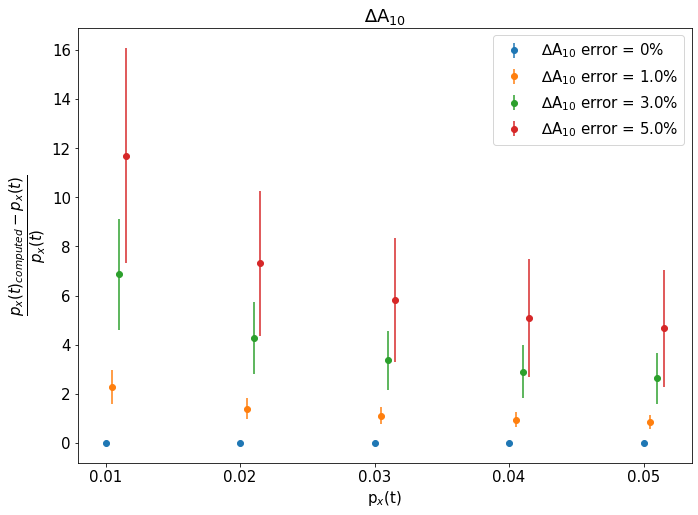

In [5]:

plot_data=df.query('abs(delta_1_err) in [0,0.01,0.03,0.05] and pxt in [0.001,0.005,0.01,0.020,0.030,0.040,0.050]').drop_duplicates()
plot_data.delta_1_err=abs(plot_data.delta_1_err)
plot_data.pxt_err=abs(plot_data.pxt_err)
plot_data=plot_data[['delta_1_err','pxt_err','pxt']].groupby(by=["pxt","delta_1_err"]).agg({'pxt_err':['mean','std']}).reset_index()
plot_data.columns=['pxt','delta_1_err','avg','sd']

plt.rc('font', size=15) 
plt.figure(figsize=(11,8))
delta_1_errs=[0,0.01,0.03,0.05]
for i in range(len(delta_1_errs)) :
    delta_1_err=delta_1_errs[i]
    y=[]
    x=[]
    er=[]
    for pxt in [0.01,0.020,0.030,0.040,0.050]:
        temp=plot_data[(plot_data.pxt==pxt) &(plot_data.delta_1_err==delta_1_err)].reset_index(drop=True)        
        y.append(float(temp.avg))
        x.append(pxt + i*5E-4)
        er.append(float(temp.sd))   
                
    plt.errorbar(x, y, er, linestyle='None', marker='o',label=r'∆A$_{10}$ '+f"error = {100*delta_1_err}%")
     
plt.title(r'∆A$_{10}$')
plt.ylabel(r'$\dfrac { {p_{x}(t)_{computed}} -{ p_{x}(t) } } { p_{x}(t)}$')
plt.xlabel(r'p$_{x}$(t)')
plt.legend()
plt.savefig("delta_A10.jpeg",dpi=900,bbox_inches='tight')

In [22]:
def NEH_Compute(A0, A1, A0_0, A1_0, pX):
    pH = 1.5574*10**(-4)
    NEH = (1 - pH - pX)*(1 - pH) / pX;
    NEH = NEH * (A1 / A0 - A1_0 / A0_0);
    return(NEH)

In [23]:
def new_pxt(i0_0,i1_0,i2_0,i0_x,i1_x,i2_x):
    i1_x_i0_x=i1_x/i0_x
    delta1_x= i1_x/i0_x - i1_0/i0_0
    delta2_x= i2_x/i0_x - i2_0/i0_0
    pxt= 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x_i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))
    neh=NEH_Compute(i0_x,i1_x,i0_0,i1_0,pxt)
    return [pxt,neh]

In [24]:
data=pd.read_csv("C:\\Workplace\\C#\\Test\\Test_test\\ConsoleApp2\\bin\\Debug\\0_01.csv")
data.head()

,Protein,Peptide,Charge,NEH,M0,M1,M2,M3,M4,M5,I0,I1,I2,I3,I4,I5,pxt
0,1433B_MOUSE,DSTLIMQLLR,2,16,0.48532,0.31604,0.13829,0.04522,0.01191,0.00263,0.413219,0.335892,0.166300,0.061064,0.017967,0.004422,0.01
1,1433B_MOUSE,YLSEVASGENK,2,23,0.50852,0.32518,0.12269,0.03414,0.00770,0.00148,0.403554,0.351843,0.167746,0.057111,0.015425,0.003496,0.01
2,1433B_MOUSE,AVTEQGHELSNEER,3,37,0.41875,0.34361,0.16191,0.05574,0.01546,0.00364,0.288690,0.344816,0.219797,0.098559,0.034699,0.010172,0.01
3,1433B_MOUSE,TAFDEAIAELDTLNEESYK,3,39,0.29105,0.33942,0.21781,0.10013,0.03661,0.01125,0.196659,0.306838,0.252412,0.144837,0.064847,0.024055,0.01
4,1433B_MOUSE,QTTVSNSQQAYQEAFEISK,2,44,0.29465,0.34115,0.21647,0.09819,0.03537,0.01070,0.189332,0.303386,0.254827,0.148671,0.067458,0.025296,0.01


In [48]:


# new_pxt(data.M0[index]/100, data.M1[index]/100, data.M2[index]/100, 
#     data.I0[index], data.I1[index], data.I2[index] )
for index in range(data.shape[0]): 
    
#     exp=[data.I0[index],data.I1[index],data.I2[index],data.I3[index],data.I4[index],data.I5[index]]
    exp=[data.I0[index],data.I1[index],data.I2[index] + data.I2[index]*0.05,data.I3[index],data.I4[index],data.I5[index]]
    exp=[x/sum(exp) for x in exp] 

    res=new_pxt(data.M0[index]/100, data.M1[index]/100, data.M2[index]/100,exp[0],exp[1],exp[2] )
    
    print(data.NEH[index],res[1])


16 -0.6775997939469849
23 -1.3792472920571703
37 -1.9341770392010746
39 -1.249494879595731
44 -1.5204738552997863
22 -1.1555215567597676
42 -1.4699761750532945
39 -2.232144123148357
37 -2.0650540381313887
44 -1.611875864024791
40 -1.3236064936937637
21 -1.225630527931247
17 -0.9211494610012388
19 -1.3107414349562205
19 -0.8205214869798075
43 -1.162324272434202
51 -1.1011586154185469
16 -0.6341923276927663
25 -0.9243788637923374
47 -2.6359029950271404
20 -0.43919714997134573
21 -0.6171375377735785
32 -0.8949118080782688
43 -1.037597103274166
14 -0.563274826517804
30 -1.2716326875223
38 -0.9886604575923332
31 -1.6269487332749837
27 -0.9234079328710614
9 -0.3668918641558166
13 -0.38962844050742396
23 -1.4318659961802025
18 -0.8014718889265617
22 -0.9621090636512537
29 -0.8819829765142908
29 -0.8050086868214017
41 -0.8381822815586272
19 -1.0246034813160825
22 -0.9180402855749078
30 -0.8125277980306888
35 -0.8435462064518935
42 -1.1290061448240827
43 -0.9910577622162241
14 -0.68306813724212